In [31]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

<font size="+3"><strong>Preparing Mexico Data</strong></font>

The first part of any data science project is preparing our data, which means making sure its in the right place and format for us to conduct our analysis. The first step of any data preparation is importing our raw data and cleaning it. 

Let's read files:

In [32]:
df1 = pd.read_csv("mexico-real-estate-1.csv")
df2 = pd.read_csv("mexico-real-estate-2.csv")
df3 = pd.read_csv("mexico-real-estate-3.csv")

## Clean `df1`

Now that we have your three DataFrames, it's time to inspect them to see if they need any cleaning. Let's look at them one-by-one.

Let's Inspect `df1` by looking at its `shape` attribute. Then use the `info` method to see the data types and number of missing values for each column. 

In [33]:
df1.shape

(700, 6)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 32.9+ KB


In [35]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


It looks like there are a couple of problems in this DataFrame that we need to solve. First, there are many rows with `NaN` values in the `"lat"` and `"lon"` columns. Second, the data type for the `"price_usd"` column is `object` when it should be `float`. 

let's Clean `df1` by dropping rows with `NaN` values. Then remove the `"$"` and `","` characters from `"price_usd"` and recast the values in the column as floats.

In [36]:
# remove na's
df1.dropna(inplace=True)

# transform price from object to float
df1['price_usd']= df1['price_usd'].str.replace("$","",regex= False).str.replace(",","").astype(float)

In [37]:
df1["area_m2"]= df1["area_m2"].astype(float)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    float64
 5   price_usd      583 non-null    float64
dtypes: float64(4), object(2)
memory usage: 31.9+ KB


## Clean `df2`

In [39]:
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn
0,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,apartment,Puebla,NaN,NaN,190,2500000
2,house,Morelos,23.634501,-102.552788,360,5300000
3,house,Morelos,NaN,NaN,76,820000
4,house,Puebla,NaN,NaN,200,1100000


Now it's time to tackle `df2`. it has the same issue of `NaN` values, but there's a new problem, too: The home prices are in Mexican pesos (`"price_mxn"`), not US dollars (`"price_usd"`). If we want to compare all the home prices in this dataset, they all need to be in the same currency.

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 32.9+ KB


Let's first, drop rows with `NaN` values in `df2`. Next, use the `"price_mxn"` column to create a new column named `"price_usd"`. (Keep in mind that, when this data was collected in 2014, a dollar cost 19 pesos.) Finally, drop the `"price_mxn"` from the DataFrame.

In [41]:
# remove nan's
df2.dropna(inplace= True)

# create a "price_usd" col
df2["price_usd"]= (df2["price_mxn"]/19).round(2)
df2= df2.drop(columns="price_mxn")
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
2,house,Morelos,23.634501,-102.552788,360,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74


In [42]:
df2["area_m2"]= df2["area_m2"].astype(float)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  571 non-null    object 
 1   state          571 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        571 non-null    float64
 5   price_usd      571 non-null    float64
dtypes: float64(4), object(2)
memory usage: 31.2+ KB


## Clean `df3`

In [44]:
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


You'll notice that we still have `NaN` values, but there are two new problems:

1. Instead of separate `"lat"` and `"lon"` columns, there's a single `"lat-lon"` column. 
2. Instead of a `"state"` column, there's a `"place_with_parent_names"` column.

We need the resolve these problems so that `df3` has the same columns in the same format as `df1` and `df2`.

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    int64  
 4   price_usd                700 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [46]:
df3["state"]= df3["place_with_parent_names"].str.split('|', expand=True)[2]

In [47]:
df3[["lat", "lon"]]= df3["lat-lon"].str.split(',', expand=True).astype(float)

In [48]:
df3.drop(columns=["lat-lon", "place_with_parent_names"], inplace=True)

In [49]:
df3["area_m2"]= df3["area_m2"].astype(float)

In [50]:
df3.dropna(inplace=True)

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  582 non-null    object 
 1   area_m2        582 non-null    float64
 2   price_usd      582 non-null    float64
 3   state          582 non-null    object 
 4   lat            582 non-null    float64
 5   lon            582 non-null    float64
dtypes: float64(4), object(2)
memory usage: 31.8+ KB


## Concatenate DataFrames

Now we have three clean DataFrames, and now it's time to combine them into a single DataFrame so that we can conduct our analysis. 

In [52]:
df = pd.concat([df1, df2, df3], axis=0)
print(df.shape)
df.head()

(1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [53]:
df.isnull().sum()

property_type    0
state            0
lat              0
lon              0
area_m2          0
price_usd        0
dtype: int64

## Save `df`

The data is clean and in a single DataFrame, and now we need to save it as a CSV file so that we can examine it in our exploratory data analysis. 

In [54]:
df.to_csv("mexico-real-estate-clean.csv", index=False)

<font size="+3"><strong> Exploratory Data Analysis </strong></font>

After importing, the next step in many data science projects is exploratory data analysis (EDA), where we get a feel for our data by summarizing its main characteristics using descriptive statistics and data visualization. A good way to plan our EDA is by looking each column and asking ourself questions what it says about our dataset.

In [55]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv("mexico-real-estate-clean.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   float64
 5   price_usd      1736 non-null   float64
dtypes: float64(4), object(2)
memory usage: 81.5+ KB


While there are only two `dtypes` in our DataFrame (`object` and `float64`), there are three categories of  data: location, categorical, and numeric. Each of these require a different kind of exploration in our analysis. 


# Location Data: `"lat"` and `"lon"`

They say that the most important thing in real estate is location, and we can see where in Mexico our houses are located by using the `"lat"` and `"lon"` columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map.

In [57]:
fig= px.scatter_mapbox(
    df,
    lat= "lat",
    lon= "lon",
    center={"lat":19.43, "lon":-99.13},
    width=600,
    height=600,
    hover_data=["price_usd"],
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

Looking at this map, are the houses in our dataset distributed evenly throughout the country, or are there states or regions that are more prevalent? Can we guess where Mexico's biggest cities are based on this distribution?

# Categorical Data: `"state"`

Even though we can get a good idea of which states are most common in our dataset from looking at a map, we can also get the exact count by using the `"state"` column. 

In [58]:
df["state"].value_counts()

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala           

# Numerical Data: `"area_m2"` and `"price_usd"`

We have a sense for where the houses in our dataset are located, but how much do they cost? How big are they? The best way to answer those questions is looking at descriptive statistics. 

In [59]:
# Describe "area_m2", "price_usd" columns
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


Let's start by looking at `"area_m2"`. It's interesting that the mean is larger than the median (another name for the 50% quartile). Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there a difference of almost 15 m<sup>2</sup> between them? To answer this question, we need to see how house sizes are distributed in our dataset. Let's look at two ways to visualize the distribution: a histogram and a boxplot.

Let's create a histogram of `"area_m2"`....

Text(0.5, 1.0, 'Distribution of Home Sizes')

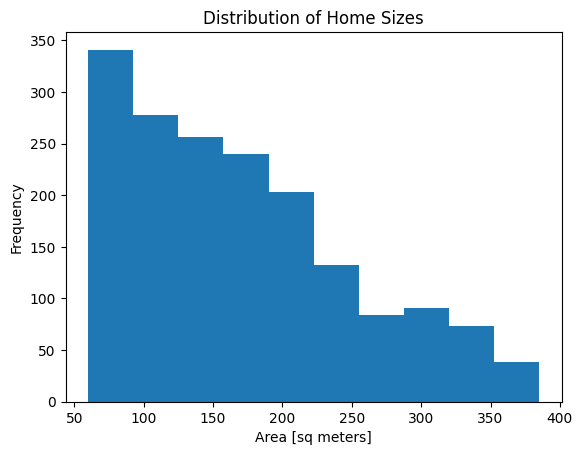

In [60]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df["area_m2"])

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Sizes")

Looking at our histogram, we can see that `"area_m2"` skews right. In other words, there are more houses at the lower end of the distribution (50–200m<sup>2</sup>) than at the higher end (250–400m<sup>2</sup>). That explains the difference between the mean and the median.

Let's create a horizontal boxplot of `"area_m2"`....

Text(0.5, 1.0, 'Distribution of Home Sizes')

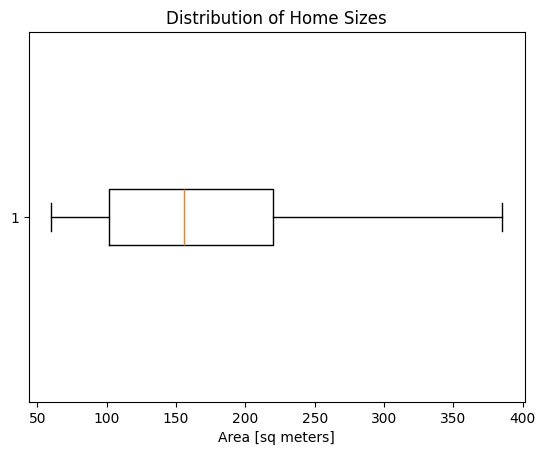

In [61]:
# Use Matplotlib to create boxplot of "area_m2"

plt.boxplot(df["area_m2"], vert=False)
# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")

Does `"price_usd"` have the same distribution as `"area_m2"`? Let's use the same two visualization tools to find out.

Let's create a histogram of `"price_usd"`...

Text(0.5, 1.0, 'Distribution of Home Prices')

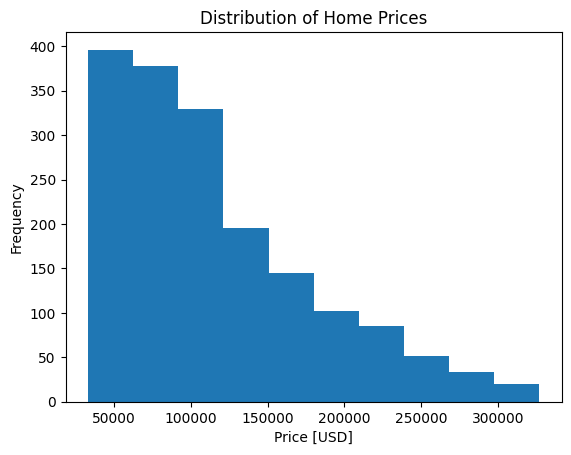

In [62]:
# Use Matplotlib to create histogram of "price_usd"

plt.hist(df["price_usd"])
# Add x-axis label
plt.xlabel("Price [USD]")

# Add y-axis label

plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Prices")

Let's create a horizontal boxplot of `"price_usd"`....

Text(0.5, 1.0, 'Distribution of Home Prices')

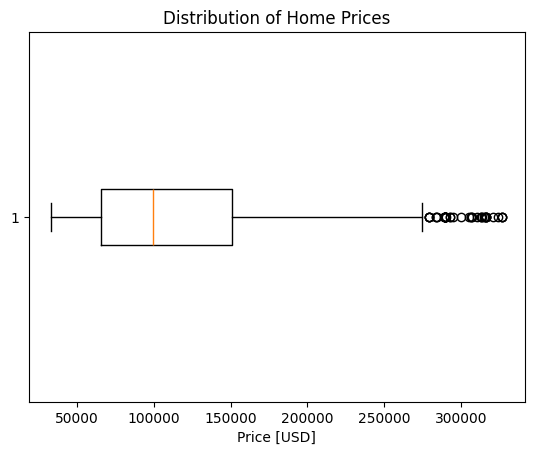

In [63]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df["price_usd"], vert=False)

# Add x-label axis
plt.xlabel("Price [USD]")

# Add y-label axis
plt.title("Distribution of Home Prices")

Now we have a sense of the dataset, let's start answering some research questions about the relationship between house size, price, and location.

<font size="+3"><strong> Location or Size: What Influences House Prices in Mexico?</strong></font>

# Research Question 1

**Which state has the most expensive real estate market?**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results. 

We know in which state each house is located thanks to the `"state"` column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group. 

In [64]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Querétaro           133955.913281
Guanajuato          133277.965833
Nuevo León          129221.985663
Distrito Federal    128347.267426
Quintana Roo        128065.416053
Name: price_usd, dtype: float64

Let's use `mean_price_by_state` to create a bar chart of your results....

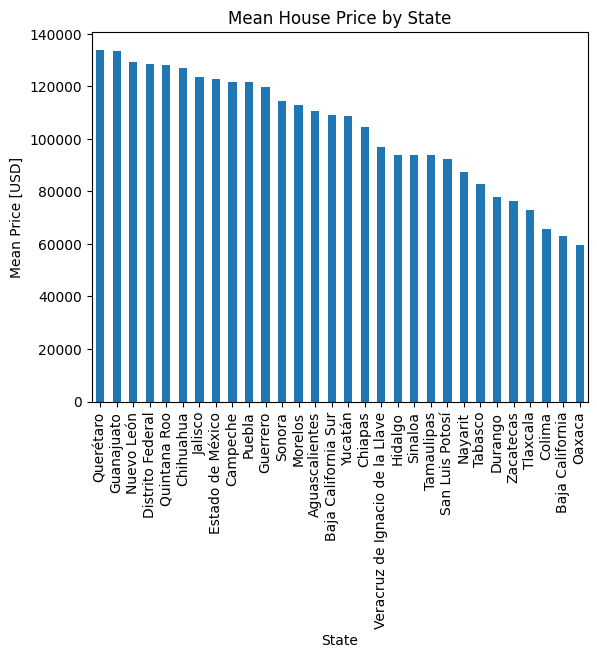

In [65]:
# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean Price [USD]",
    title="Mean House Price by State"
);

It seems odd that Querétaro would be the most expensive real estate market in Mexico when, [according to recent GDP numbers](https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP), it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m<sup>2</sup>. In order to do that, we need to create a new column.

Let'w create a new column in `df` called `"price_per_m2"`. This should be the price for each house divided by it's size....

In [66]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"]/df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


Let's redo our bar chart from above, but this time with the mean of `"price_per_m2"` for each state.

In [67]:
# Group `df` by "state", create bar chart of "price_per_m2"
mean_price_per_meter_by_state= df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False)
mean_price_per_meter_by_state

state
Distrito Federal                   1175.889150
Estado de México                    763.753422
Guerrero                            761.557206
Jalisco                             743.568107
Quintana Roo                        736.455284
Nuevo León                          723.710040
Puebla                              700.701974
Querétaro                           687.227849
Oaxaca                              683.019737
Guanajuato                          672.908100
Baja California Sur                 662.401953
Morelos                             649.383992
Tabasco                             643.503348
Campeche                            601.291762
Nayarit                             599.293627
Baja California                     598.852988
Chihuahua                           591.226747
Chiapas                             560.317146
Sinaloa                             546.536310
Yucatán                             545.889476
Tamaulipas                          541.282076
Veracru

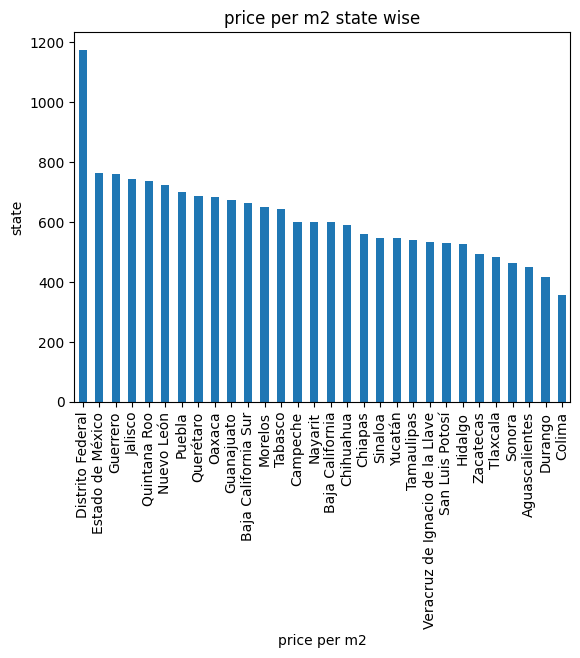

In [68]:
mean_price_per_meter_by_state.plot(
    kind="bar",
    xlabel="price per m2",
    ylabel="state",
    title="price per m2 state wise"
);

Now we see that the capital Mexico City (*Distrito Federal*) is by far the most expensive market.  Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

# Research Question 2

**Is there a relationship between home size and price?**

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

Let's create a scatter plot from `df` that represents price as a function of size. In other words....

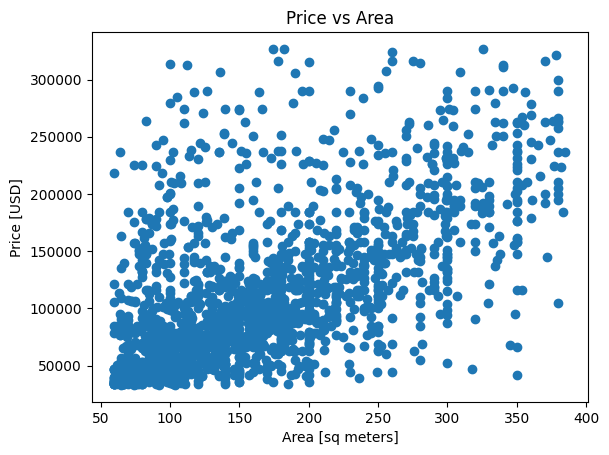

In [69]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x="area_m2", y="price_usd", data=df)

# Add x-axis label

plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Price vs Area");

While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price. But how can we quantify this correlation? 

Using the `corr` method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"`. 

In [70]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.585518245323206


The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

Let'a create a new DataFrame named `df_morelos`. It includes all the houses from `df` that are in the state of Morelos.

In [71]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df["state"]=="Morelos"]

# Print object type, shape, and head
print("df_morelos type:", type(df_morelos))
print("df_morelos shape:", df_morelos.shape)
df_morelos.head()

df_morelos type: <class 'pandas.core.frame.DataFrame'>
df_morelos shape: (160, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281.0,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117.0,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73.0,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130.0,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305.0,227351.46,745.414623


Using `df_morelos`, let's create a scatter plot that shows price vs area...

Text(0.5, 1.0, 'price_usd vs area_m2')

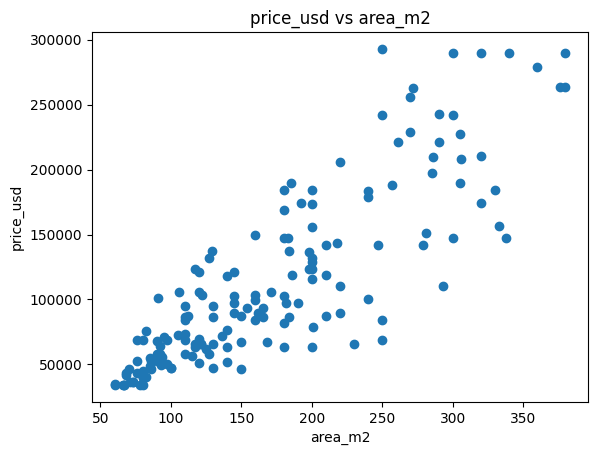

In [72]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos

plt.scatter(df_morelos["area_m2"], df_morelos["price_usd"])
# Add x-axis label
plt.xlabel("area_m2")

# Add y-axis label
plt.ylabel("price_usd")

# Add title
plt.title("price_usd vs area_m2")

Wow! It looks like the correlation is even stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case.

Using the `corr` method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"` in `df_morelos`. 

In [73]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077608713712


With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos. 

To conclude, let's look at the capital Mexico City (*Distrito Federal*).  

df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (179, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.6301097972990687


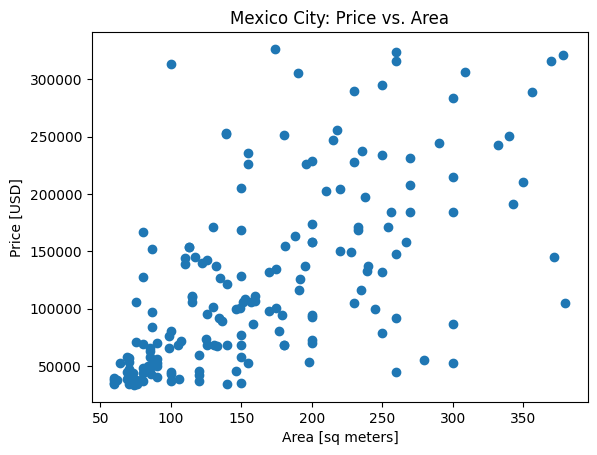

In [74]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"]=="Estado de México"]
# Print object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])  # REMOVERHS

# Add x-axis label
plt.xlabel("Area [sq meters]") 

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Mexico City: Price vs. Area")

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)

Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price. How should we interpret this? 

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price.

We seen that our "area_m2" and "price_usd" wew right skewed, So let's handle those outliers...

In [75]:
low, high= df["area_m2"].quantile([0.1, 0.9])
low, high

(79.0, 298.0)

In [76]:
df.loc[df["area_m2"]<low, "area_m2"]=low
df.loc[df["area_m2"]>high, "area_m2"]=high

In [77]:
low, high= df["price_usd"].quantile([0.1, 0.9])
low, high

(44736.84, 210795.91)

In [78]:
df.loc[df["price_usd"]<low, "price_usd"]=low
df.loc[df["price_usd"]>high, "price_usd"]=high

Now that our dataset is free of outliers, it's time to look into categorical fearues...


## Split

A key part in any model-building project is separating your **target** (the thing we want to predict) from our **features** (the information our model will use to make its predictions)....

We have two categorical features "state" and "property_type". we will not include state column into model training data and will do encoding of "property_type"...

In [79]:
target = "price_usd"
y = df[target]
X= df.drop(columns=["price_per_m2", "state", target])

### Split into train and test


In [80]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1388, 4)
(348, 4)
(1388,)
(348,)


# Build Model

## Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be. 

Calculate the mean of your target vector `y_train` and assign it to the variable `y_mean`.

In [81]:
y_mean = y_train.mean()
y_mean

110524.19585014407

Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset. 

Create a list named `y_pred_baseline` that contains the value of `y_mean` repeated so that it's the same length at `y`.


In [82]:
y_pred_baseline = [y_mean] *len(y_train)
y_pred_baseline[:5]

[110524.19585014407,
 110524.19585014407,
 110524.19585014407,
 110524.19585014407,
 110524.19585014407]

let's calculate the baseline mean absolute error for our predictions in `y_pred_baseline` as compared to the true targets in `y`...

In [83]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 110524.2
Baseline MAE: 46464.6


What does this information tell us? If we always predicted that an apartment price is $110524.2 our predictions would be off by an average of $46464.6 . It also tells us that our model needs to have mean absolute error below $46464.6 in order to be useful. 

## Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until we're happy with the model's performance.

In [84]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

The second thing we need to do is use our data to train our model. Another way to say this is fit our model to the training data. 

In [85]:
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['property_type'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

## Evaluate

The final step is to evaluate our model. In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. So let's have it predict the price for the houses in our training set.

In [86]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([113540.91410376,  59631.93480478, 122983.44905095,  98224.31331105,
       151446.5790323 ])

Now that we have predictions, we'll use them to assess our model's performance with the training data. We'll use the same metric we used to evaluate our baseline model: mean absolute error. 

In [87]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 30663.42


Good news: Our model beat the baseline by over \$10,000! That's a good indicator that it will be helpful in predicting apartment and house prices. But the real test is how the model performs on data that it hasn't seen before, data that we call the **test set**.

In [88]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    152651.611521
1    114681.592182
2    144924.821594
3     98306.521258
4    153412.100432
dtype: float64

Ideally, you want your test performance metrics to be the same as its training performance metrics. In practice, test metrics tend to be a little worse (this means a larger number in the case of mean absolute error). But as long as the training and test performance are close to each other, you can be confident that your model will generalize well. 

In [89]:
mae_test= mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", round(mae_test, 2))

Test MAE: 30582.94


# Communicate Results

Once your model is built and tested, it's time to share it with others. If you're presenting to simple linear model to a technical audience, they might appreciate an equation. When we created our baseline model, we represented it as a line. The equation for a line like this is usually written as: "y = m1*x1 +m2x2+..+ b"


Extract the intercept from your model, and assign it to the variable `intercept`. 

In [90]:
intercept = round(model.named_steps["linearregression"].intercept_,2)
print("Model Intercept:", intercept)

Model Intercept: -18372.65


Next comes the coefficient. We'll extract it in a very similar way.

In [91]:
coefficient = model.named_steps["linearregression"].coef_
print("'Model's coefficients are:", coefficient)

'Model's coefficients are: [ 23083.42771957 -23083.42771957  -2523.69971149   -970.35806798
    585.58403069]


In [92]:
X_test.columns

Index(['property_type', 'lat', 'lon', 'area_m2'], dtype='object')

In [93]:
def make_prediction(property_type, lat, lon, area_m2):
    data= {
        "property_type":property_type,
        "lat":lat,
        "lon":lon,
        "area_m2":area_m2
    }
    df= pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

Let's see if your function works. Run the cell below to find out!

In [94]:
make_prediction("apartment",19.21, 12.1, 123.12)

'Predicted apartment price: $16586.28'

Another type of deployment is creating and interactive dashboard, where a user can supply values and receive a prediction. Let's create one using [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/index.html).<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

Let's add your `make_prediction` to the interact widget below, run the cell, and then adjust the widget to see how predicted apartment price changes. 

- Create an interact function in Jupyter Widgets.

In [95]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [96]:
interact(
    make_prediction,
    property_type=Dropdown(
        options=sorted(X_train["property_type"].unique())
        ),  
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    area_m2=FloatSlider(
        min=X_train["area_m2"].min(),
        max=X_train["area_m2"].max(),
        value=X_train["area_m2"].mean(),
    )
);

interactive(children=(Dropdown(description='property_type', options=('apartment', 'house'), value='apartment')…